# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [29]:
# Libraries
import numpy as np
import pylab as plt
import pandas as pd
import seaborn as sns

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [30]:
# your code here
fitbit = pd.read_csv(r"C:\Users\Juan\Desktop\IronHack_apuntes\5.2-lab_matplotlib_seaborn\data\Fitbit2.csv")

In [31]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        367 non-null    object 
 1   Calorie burned              367 non-null    int64  
 2   Steps                       367 non-null    int64  
 3   Distance                    367 non-null    float64
 4   Floors                      367 non-null    int64  
 5   Minutes Sedentary           367 non-null    float64
 6   Minutes Lightly Active      367 non-null    int64  
 7   Minutes Fairly Active       367 non-null    int64  
 8   Minutes Very Active         367 non-null    int64  
 9   Activity Calories           367 non-null    int64  
 10  MinutesOfSleep              367 non-null    int64  
 11  MinutesOfBeingAwake         367 non-null    int64  
 12  NumberOfAwakings            367 non-null    int64  
 13  LengthOfRestInMinutes       367 non

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [32]:
# AVERAGE STEPS BY MONTH_ENCODED
# your code here
mediana = fitbit[['Months_encoded', 'Steps']].groupby('Months_encoded', as_index=False).median()

mediana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Months_encoded  12 non-null     int64  
 1   Steps           12 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 320.0 bytes


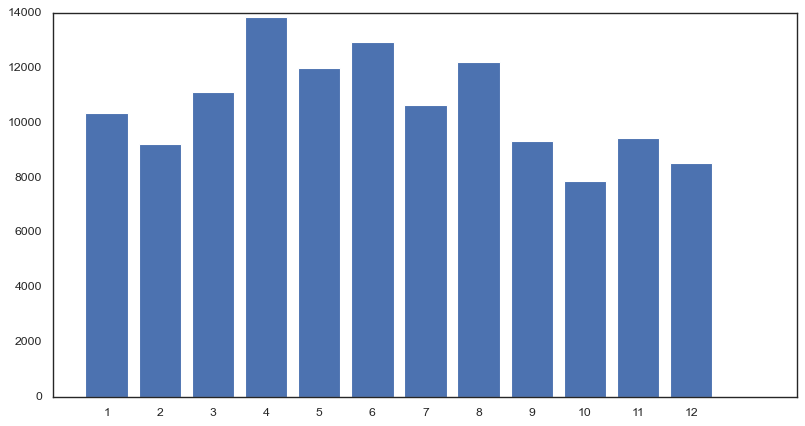

In [33]:
# AVERAGE STEPS BY WORK_OR_WEEKEND
# your code here


plt.bar(x=mediana.Months_encoded , height=mediana.Steps)
plt.rcParams['figure.figsize']=(12, 4)
plt.sca
plt.xticks(ticks=mediana['Months_encoded']);
plt.savefig('steps_by_Months_encoded.png')           



#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

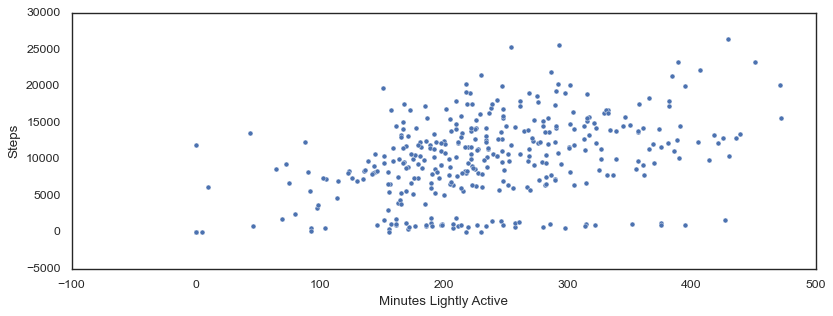

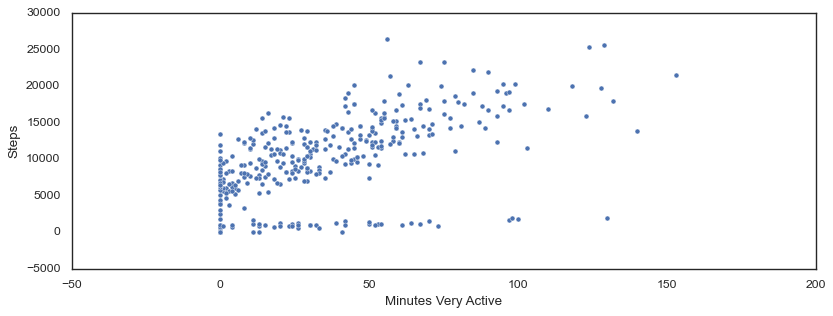

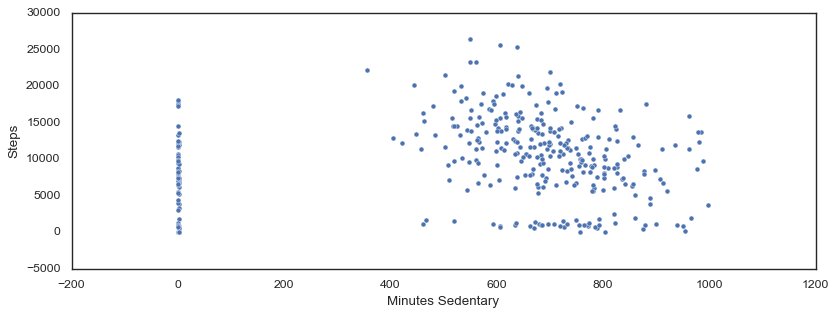

In [34]:
# your code here

sns.scatterplot(data=fitbit, x='Minutes Lightly Active', y='Steps')

plt.show();

sns.scatterplot(data=fitbit, x='Minutes Very Active', y='Steps')

plt.show()


sns.scatterplot(data=fitbit, x='Minutes Sedentary', y='Steps')

plt.show()



## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [35]:
# your code here


titanic= pd.read_csv('../data/titanic.csv')

titanic.head()



,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [36]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [37]:
# NUMERICAL VARIABLES
# your code here
number = titanic.select_dtypes(include = ["number"])

number.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [38]:
# CATEGORICAL VARIABLES
# your code here


cat = titanic.select_dtypes(include = ["object"])

cat.head()



,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [39]:
# your code here
import matplotlib.pyplot as plt
plt.style.use('classic')
plt.rcParams['figure.figsize']=(12,6)



#### Use the right visulalization to show the distribution of column `Age`.

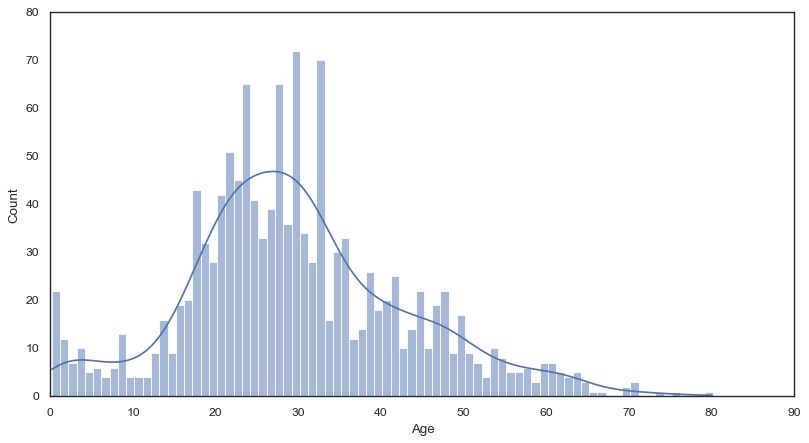

In [40]:
# your code here
sns.set(style='white')
sns.histplot(x=titanic.Age,
             binwidth=1,
             kde=True
            );

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

Text(0.5, 0, 'AGE')

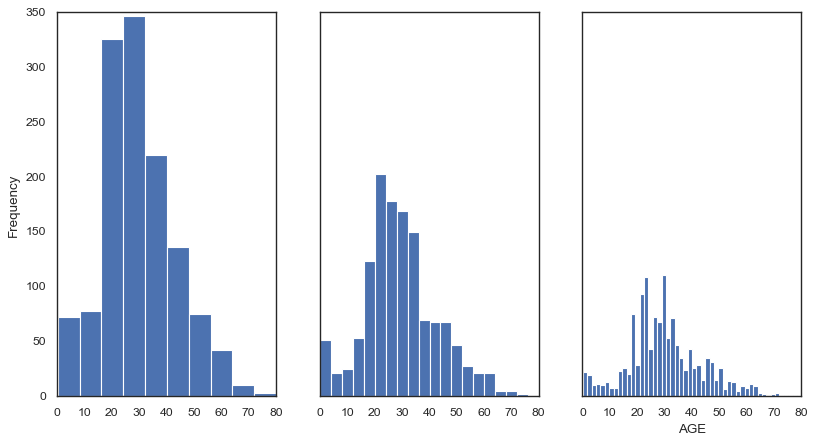

In [41]:
# your code here
fig, ax = plt.subplots(1, 3, sharey=True, sharex= True) 

titanic.Age.plot.hist(bins=10, ax=ax[0])

titanic.Age.plot.hist(bins=20, ax=ax[1])

titanic.Age.plot.hist(bins=50, ax=ax[2])

plt.xlabel('AGE')


#### How does the bin size affect your plot?

In [42]:
"""
your comments here
"""

'\nyour comments here\n'

#### Use seaborn to show the distribution of column `Age`.

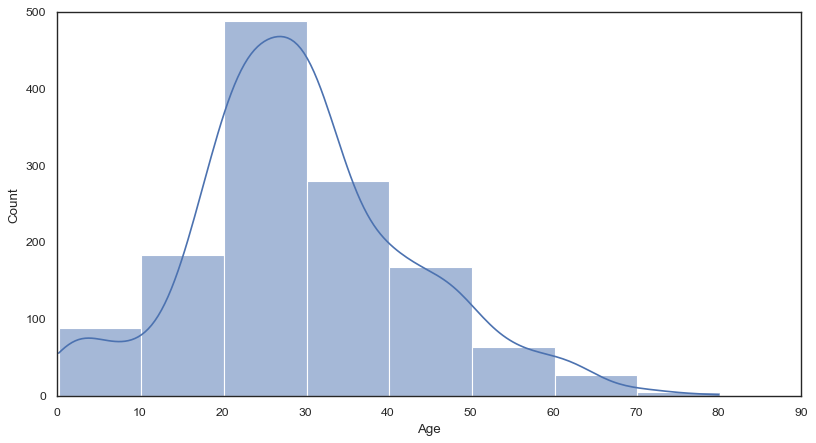

In [43]:
# your code here
sns.set(style='white')
sns.histplot(x=titanic.Age,
             binwidth=10,
             kde=True
            );



#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

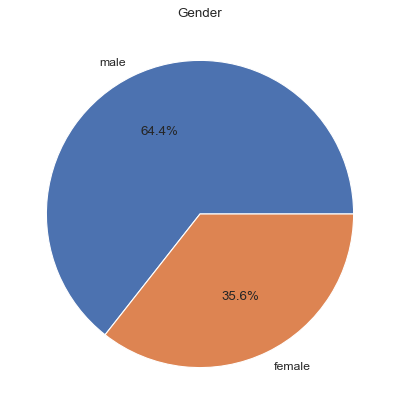

In [44]:
# Method 1 - matplotlib
# your code here
counts = titanic['Gender'].value_counts()


plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Gender')
plt.show()

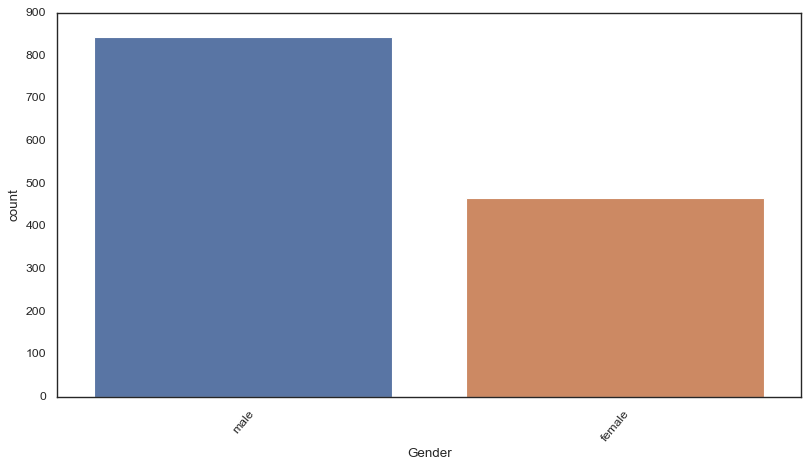

In [45]:
# Method 2 - seaborn
# your code here
sns.countplot(x=titanic.Gender)

plt.xticks(rotation=50);

#### Use the right plot to visualize the column `Pclass`.

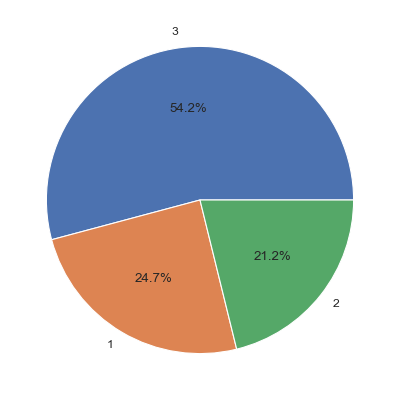

In [46]:
# your code here
counts = titanic['Pclass'].value_counts()


plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title
plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

In [47]:
# your code here
summary= titanic.Age.describe()

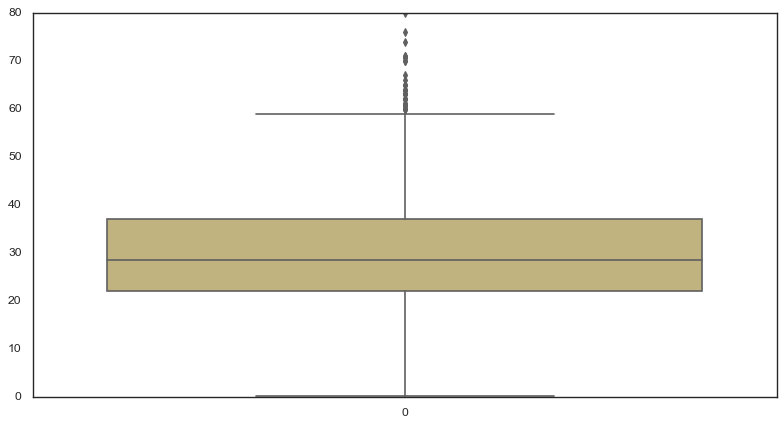

In [48]:
sns.boxplot(data=titanic.Age, color='y');

In [49]:
"""
your comments here
"""

'\nyour comments here\n'

#### What does the last plot tell you about the feature `Age`?

In [50]:
"""
Entorno a 30 años
"""

'\nEntorno a 30 años\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

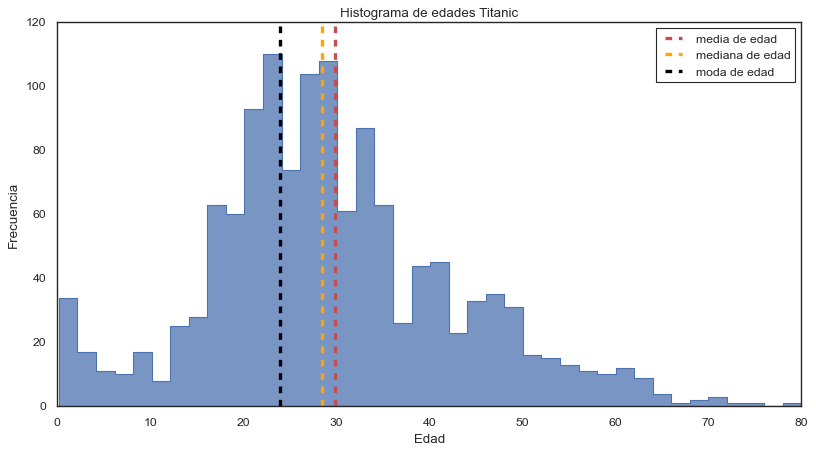

In [51]:
# your code here
sns.histplot(x=titanic.Age,
             bins=40,
             element='step');   


plt.axvline(titanic.Age.mean(),
            c='r',
            linewidth=3.,
            linestyle='--',
            label='media de edad')

plt.axvline(titanic.Age.median(),
            c='orange',
            linewidth=3.,
            linestyle='--',
            label='mediana de edad')

plt.axvline(titanic.Age.mode()[0],
            c='black',
            linewidth=3.,
            linestyle='--',
            label='moda de edad')

plt.title('Histograma de edades Titanic')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend()

plt.show();

#### What additional information does the last plot provide about feature `Age`?

In [52]:
"""
your comments here
"""

'\nyour comments here\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

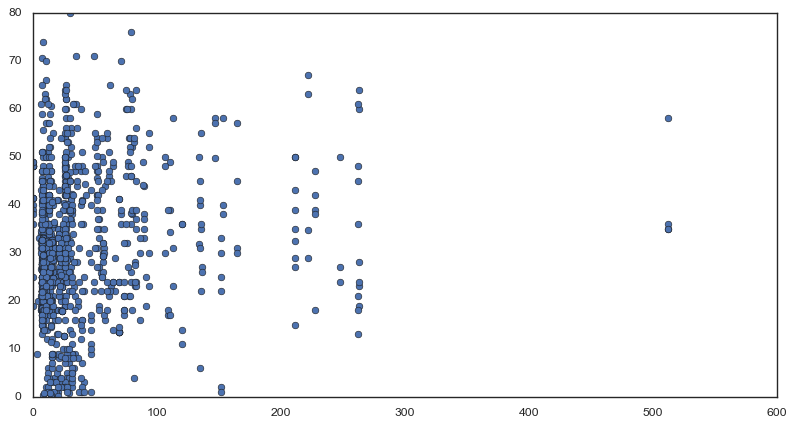

In [53]:
# Method 1 - matplotlib
# your code here
plt.plot(titanic.Fare, titanic.Age, 'o');

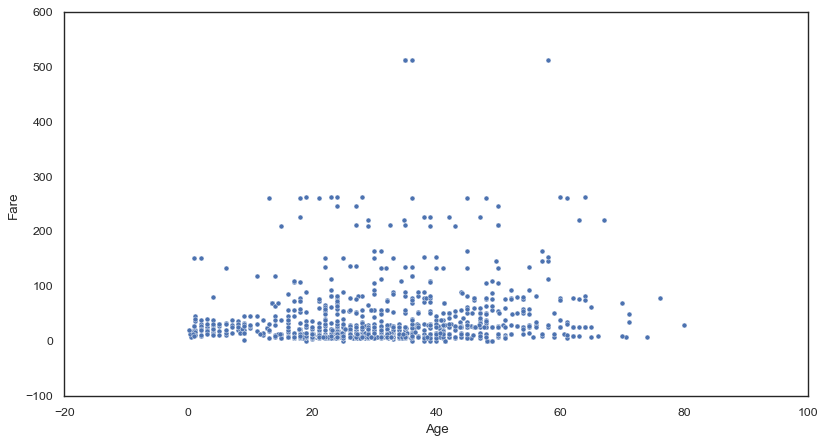

In [54]:
# Method 2 - seaborn
# your code here
sns.scatterplot(data=titanic, x='Age', y='Fare')


plt.show();

#### Plot the correlation matrix using seaborn.

In [56]:
# your code here
sns.set(style='white')                            

mascara=np.triu(np.ones_like(corr, dtype=bool))   

cmap=sns.diverging_palette(0, 10, as_cmap=True)   


sns.heatmap(corr,            
            mask=mascara,   
            cmap=cmap,      
            vmax=1,          
            vmin=-1,          
            center=0,         
            square=True,      
            linewidth=0.5,     #npi
                        
           );

NameError: name 'corr' is not defined

#### What are the most correlated features?

In [ ]:
"""
your comments here
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

In [ ]:
# your code here

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

In [ ]:
# your code here